In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,mean_squared_error,r2_score,confusion_matrix

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Walmart.csv')

In [3]:
data.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [4]:
data.tail()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
3198,CA-2013-125794,30-09-2013,04-10-2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32
3202,CA-2014-119914,05-05-2014,10-05-2014,Chris Cortes,United States,Westminster,California,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2.0,72.95


In [5]:
data.shape

(3203, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


In [8]:
data.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


In [9]:
data.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

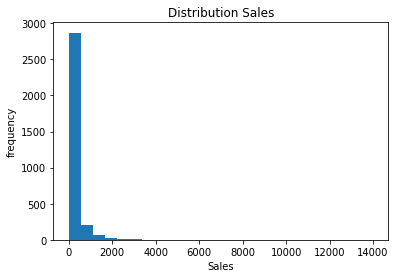

In [12]:
plt.hist(data['Sales'],bins=25)
plt.title('Distribution Sales')
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.show()

In [14]:
corr=data[['Sales','Quantity','Profit']].corr()

In [15]:
corr

,Sales,Quantity,Profit
Sales,1.000000,0.214665,0.647477
Quantity,0.214665,1.000000,0.093240
Profit,0.647477,0.093240,1.000000


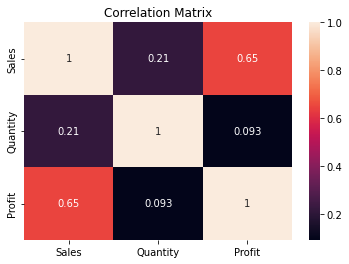

In [18]:
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [23]:
category_Sales=data.groupby('Category')['Sales'].sum().reset_index()

In [24]:
category_Sales

,Category,Sales
0,Accessories,61114.10
1,Appliances,30236.32
2,Art,9212.06
3,Binders,55961.11
4,Bookcases,36004.18
5,Chairs,101781.36
6,Copiers,49749.23
7,Envelopes,4118.10
8,Fasteners,923.20
9,Furnishings,30072.73


In [26]:
category_profit=data.groupby('Category')['Profit'].sum().reset_index()

In [27]:
category_profit

,Category,Profit
0,Accessories,16484.62
1,Appliances,8261.29
2,Art,2374.15
3,Binders,16096.78
4,Bookcases,-1646.50
5,Chairs,4027.62
6,Copiers,19327.25
7,Envelopes,1908.71
8,Fasteners,275.19
9,Furnishings,7641.26


In [31]:
Sales_Profit=pd.merge(category_Sales,category_profit,on='Category')

In [32]:
Sales_Profit

,Category,Sales,Profit
0,Accessories,61114.10,16484.62
1,Appliances,30236.32,8261.29
2,Art,9212.06,2374.15
3,Binders,55961.11,16096.78
4,Bookcases,36004.18,-1646.50
5,Chairs,101781.36,4027.62
6,Copiers,49749.23,19327.25
7,Envelopes,4118.10,1908.71
8,Fasteners,923.20,275.19
9,Furnishings,30072.73,7641.26


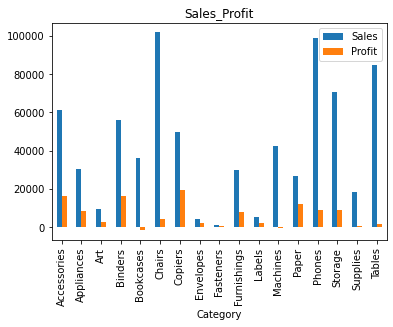

In [35]:
Sales_Profit.plot(x='Category',y=['Sales','Profit'],kind='bar')
plt.title('Sales_Profit')
plt.show()

In [36]:
State_Sales=data.groupby('State')['Sales'].sum().reset_index()

In [37]:
State_Sales

,State,Sales
0,Arizona,35282.02
1,California,457687.68
2,Colorado,32108.12
3,Idaho,4382.49
4,Montana,5589.35
5,Nevada,16729.10
6,New Mexico,4783.54
7,Oregon,17431.14
8,Utah,11220.06
9,Washington,138641.29


In [38]:
State_Profit=data.groupby('State')['Profit'].sum().reset_index()

In [39]:
State_Profit

,State,Profit
0,Arizona,-3427.87
1,California,76381.60
2,Colorado,-6527.86
3,Idaho,826.73
4,Montana,1833.32
5,Nevada,3316.76
6,New Mexico,1157.13
7,Oregon,-1190.48
8,Utah,2546.56
9,Washington,33402.70


In [40]:
State_Profit_Sales=pd.merge(State_Sales,State_Profit,on='State')

In [42]:
State_Profit_Sales

,State,Sales,Profit
0,Arizona,35282.02,-3427.87
1,California,457687.68,76381.60
2,Colorado,32108.12,-6527.86
3,Idaho,4382.49,826.73
4,Montana,5589.35,1833.32
5,Nevada,16729.10,3316.76
6,New Mexico,4783.54,1157.13
7,Oregon,17431.14,-1190.48
8,Utah,11220.06,2546.56
9,Washington,138641.29,33402.70


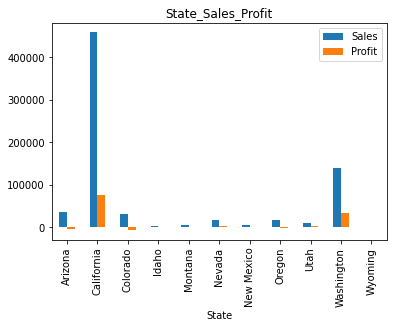

In [43]:
State_Profit_Sales.plot(x='State',y=['Sales','Profit'],kind='bar')
plt.title('State_Sales_Profit')
plt.show()

In [44]:
City_Sales=data.groupby('City')['Sales'].sum().reset_index()

In [45]:
City_Profit=data.groupby('City')['Profit'].sum().reset_index()

In [46]:
City_Profit_Sales=pd.merge(City_Sales,City_Profit,on='City')

In [47]:
City_Profit_Sales

,City,Sales,Profit
0,Albuquerque,2220.17,634.09
1,Anaheim,7986.88,1233.98
2,Antioch,19.44,9.33
3,Apple Valley,1915.09,283.62
4,Arvada,503.40,59.85
...,...,...,...
164,Westminster,3826.65,763.70
165,Whittier,444.77,44.48
166,Woodland,264.66,33.39
167,Yucaipa,50.80,13.21


<AxesSubplot:xlabel='City'>

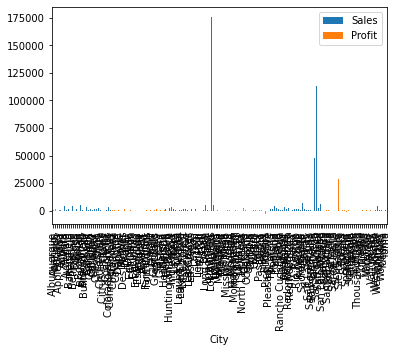

In [48]:
City_Profit_Sales.plot(x='City',y=['Sales','Profit'],kind='bar')

In [49]:
le=LabelEncoder()

In [51]:
data.drop(['Order ID', 'Order Date', 'Ship Date', 'Customer Name'], axis=1,inplace=True)

In [52]:
data.columns

Index(['Country', 'City', 'State', 'Category', 'Product Name', 'Sales',
       'Quantity', 'Profit'],
      dtype='object')

In [61]:
data['Country']=le.fit_transform(data['Country'])
data['City']=le.fit_transform(data['City'])
data['State']=le.fit_transform(data['State'])
data['Product Name']=le.fit_transform(data['Product Name']) 

In [62]:
data.head()

,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,0,80,1,10,1164,14.62,2.0,6.87
1,0,80,1,9,464,48.86,7.0,14.17
2,0,80,1,2,915,7.28,4.0,1.97
3,0,80,1,13,884,907.15,4.0,90.72
4,0,80,1,3,404,18.50,3.0,5.78


In [58]:
data.dropna(inplace=True)

In [63]:
x=data.drop(['Category'],axis=1)
y=data['Category']

In [64]:
x

,Country,City,State,Product Name,Sales,Quantity,Profit
0,0,80,1,1164,14.62,2.0,6.87
1,0,80,1,464,48.86,7.0,14.17
2,0,80,1,915,7.28,4.0,1.97
3,0,80,1,884,907.15,4.0,90.72
4,0,80,1,404,18.50,3.0,5.78
...,...,...,...,...,...,...,...
3198,0,80,1,870,36.24,1.0,15.22
3199,0,31,1,1237,91.96,2.0,15.63
3200,0,31,1,36,258.58,2.0,19.39
3201,0,31,1,754,29.60,4.0,13.32


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [86]:
x_train

,Country,City,State,Product Name,Sales,Quantity,Profit
2320,0,133,1,1188,107.97,3.0,22.67
1825,0,77,1,934,2.94,1.0,0.79
561,0,144,9,272,9.26,2.0,3.06
282,0,133,1,873,17.12,2.0,8.05
1360,0,16,0,5,7.92,1.0,2.77
...,...,...,...,...,...,...,...
1095,0,133,1,729,48.64,2.0,15.81
1130,0,80,1,1366,45.36,7.0,21.77
1294,0,144,9,123,37.44,6.0,16.85
860,0,31,1,519,124.36,2.0,33.58


In [87]:
rfc=RandomForestClassifier()

In [88]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
rfc.score(x_test,y_test)

0.6380655226209049

In [92]:
cross_val_pred=cross_val_predict(estimator=rfc,X=x_train,y=y_train,cv=10)

In [93]:
cross_val_pred

array([ 0,  2,  3, ..., 12,  1,  5])

In [96]:
classification_report(y_train,cross_val_pred)

'              precision    recall  f1-score   support\n\n           0       0.57      0.71      0.63       211\n           1       0.44      0.34      0.39       111\n           2       0.55      0.57      0.56       198\n           3       0.60      0.78      0.68       380\n           4       0.50      0.34      0.40        62\n           5       0.71      0.76      0.73       164\n           6       0.59      0.56      0.57        18\n           7       0.46      0.20      0.28        54\n           8       0.45      0.24      0.31        54\n           9       0.52      0.48      0.50       239\n          10       0.83      0.74      0.78        92\n          11       0.50      0.20      0.29        30\n          12       0.84      0.80      0.82       373\n          13       0.63      0.66      0.64       215\n          14       0.54      0.56      0.55       216\n          15       0.61      0.25      0.35        56\n          16       0.62      0.55      0.58        89\n\n    a

In [97]:
y_pred=rfc.predict(x_test)

In [98]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.54      0.64      0.58        47\n           1       0.58      0.44      0.50        25\n           2       0.61      0.65      0.63        52\n           3       0.63      0.89      0.74        91\n           4       0.58      0.39      0.47        18\n           5       0.70      0.81      0.75        43\n           6       0.75      0.43      0.55         7\n           7       0.17      0.08      0.11        13\n           8       0.50      0.22      0.31        18\n           9       0.56      0.54      0.55        65\n          10       0.87      0.83      0.85        24\n          11       0.25      0.11      0.15         9\n          12       0.85      0.87      0.86        77\n          13       0.69      0.60      0.64        62\n          14       0.51      0.50      0.51        50\n          15       0.60      0.23      0.33        13\n          16       0.62      0.56      0.59        27\n\n    a

In [99]:
# Sales 

x=data.drop(['Sales'],axis=1)
y=data['Sales']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [109]:
x_train

,Country,City,State,Category,Product Name,Quantity,Profit
1139,0,144,9,13,1204,1.0,2.70
1760,0,80,1,9,832,3.0,4.44
528,0,133,1,9,319,3.0,6.22
1114,0,141,6,0,774,9.0,18.50
2317,0,133,1,5,601,3.0,71.77
...,...,...,...,...,...,...,...
763,0,133,1,2,1211,5.0,7.99
835,0,113,8,3,214,3.0,3.50
1653,0,106,0,13,1039,2.0,-14.60
2607,0,84,9,8,113,12.0,0.93


In [110]:
lr=LinearRegression()

In [111]:
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
lr.score(x_test,y_test)

0.35127043552781145

In [113]:
cross_val_pred=cross_val_predict(estimator=lr,X=x_train,y=y_train,cv=10)

In [114]:
cross_val_pred

array([ 77.18144276, 144.10420499, 186.79271591, ..., 120.3457986 ,
       537.6516323 , 193.80526651])

In [116]:
y_pred=lr.predict(x_test)

In [118]:
MSE=mean_squared_error(y_test,y_pred)
MSE

96638.65780735978

In [120]:
root_MSE=np.sqrt(MSE)
root_MSE

310.867588865999

In [121]:
r2_score(y_test,y_pred)

0.35127043552781145

In [122]:
# Random Forest Regressor

In [123]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [124]:
rfr.score(x_test,y_test)

0.7660140227307602

In [125]:
y_pred=rfr.predict(x_test)

In [127]:
MSE=mean_squared_error(y_test,y_pred)
MSE

34855.95851861646

In [128]:
Root_MSE=np.sqrt(MSE)
Root_MSE

186.69750538937703

In [129]:
r2_score(y_test,y_pred)

0.7660140227307602